# Distillationのサンプル

モジュールの再読み込み iPython

In [2]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


matplotlibの描画有効

In [3]:
%matplotlib inline

蒸留のサンプルコード

Teacher model with Hard target
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_29 (Dropout)         (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_15 (Flatten)         (None, 9216)              0         
_________________________________________________________________
dense_29 (Dense)             (None, 128)               1179776   
_________________________________________________________________
dropout_30 (Dropout)         (None, 128)     

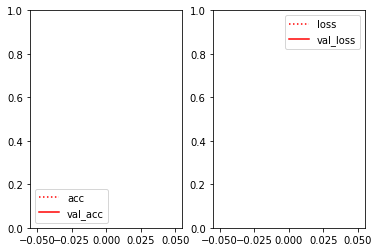

[0.045187917368928902, 0.9849]
Student model with Hard target
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_32 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 24, 24, 16)        2320      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 12, 12, 16)        0         
_________________________________________________________________
dropout_31 (Dropout)         (None, 12, 12, 16)        0         
_________________________________________________________________
flatten_16 (Flatten)         (None, 2304)              0         
_________________________________________________________________
dense_31 (Dense)             (None, 32)                73760     
_________________________________________________________________
dropout_32 (Dr

In [12]:
# -*- coding: utf_8 -*-
''' Main Functions ''' 

#----------------------------------------------------------
# Imports
#----------------------------------------------------------
from ex_model import ModelTeacher, ModelStudent
from ex_dataset import DatasetMNIST
from ex_util  import Util

NUM_EPOCH = 1
NUM_BATCH_SIZE = 32

#----------------------------------------------------------
# Functions
#----------------------------------------------------------
def training():
    
    # データ取得
    #--------------------------------------
    dataset = DatasetMNIST()
    dataset.create_conv()

    # 教師モデルをハードターゲットで訓練
    #--------------------------------------
    print("Teacher model with Hard target")
    teacher = ModelTeacher()
    teacher.set_dataset(dataset)
    teacher.create()
    teacher.show()
    teacher.fit(batch_size=NUM_BATCH_SIZE, epochs=NUM_EPOCH)
    teacher.result()
    teacher.evaluate()

    # 生徒モデルをハードターゲットで訓練
    #--------------------------------------
    print("Student model with Hard target")
    student = ModelStudent()
    student.set_dataset(dataset)
    student.create()
    student.show()
    #student.fit(batch_size=NUM_BATCH_SIZE, epochs=NUM_EPOCH)
    #student.result()
    #student.evaluate()


    # 生徒モデルをソフトターゲットで訓練
    #--------------------------------------
    print("Student model with Soft target")
    student2 = ModelStudent()
    student2.set_dataset(dataset)
    student2.create()

    # 教師モデルのソフトマックス層を温度付きに変更
    teacher.set_softmax_temperature(10)
    student2.set_softmax_temperature(10)

    # 教師モデルの温度付き出力を教師として生徒モデルを訓練
    student2.set_teacher(teacher)
    student2.fit_with_teacher(batch_size=NUM_BATCH_SIZE, epochs=NUM_EPOCH)
    student2.result()

    # 評価前に温度を1に設定
    student2.set_softmax_temperature(1)
    student2.evaluate()

#----------------------------------------------------------
# 実行スクリプト
#----------------------------------------------------------
if __name__ == '__main__':
    training()
